<a href="https://colab.research.google.com/github/lukasztracz195/DeepLearningInPythonCourse/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Konwolucyjna Sieć Neuronowa - MNIST

### Import bilbiotek

In [27]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

### Podział zbioru na treningowy i testowy

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Eksploracja

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba danych treningowych: ', X_train.shape[0])
print('Liczzba danych testowych: ',X_test.shape[0])
print("Rozmiar pojedynczego obrazka: ", X_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych:  60000
Liczzba danych testowych:  10000
Rozmiar pojedynczego obrazka:  (28, 28)


(-0.5, 27.5, 27.5, -0.5)

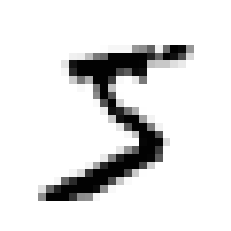

In [30]:
plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

In [31]:
print(keras.backend.image_data_format())

channels_last


In [32]:
img_rows, img_cols = 28,28
if keras.backend.image_data_format() == 'channel_first':
  X_train = X_train.reshape(X_train)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

print(input_shape)

(28, 28, 1)


In [33]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [34]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


##Budowa modelu

In [35]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
____________________________________________

In [36]:
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics =['accuracy'])

In [37]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 139s 295ms/step - loss: 2.2827 - accuracy: 0.2241 - val_loss: 2.2515 - val_accuracy: 0.3967
Epoch 2/20
469/469 [==============================] - 139s 296ms/step - loss: 2.2116 - accuracy: 0.4698 - val_loss: 2.1649 - val_accuracy: 0.5216
Epoch 3/20
469/469 [==============================] - 138s 294ms/step - loss: 2.0993 - accuracy: 0.5730 - val_loss: 2.0159 - val_accuracy: 0.6161
Epoch 4/20
469/469 [==============================] - 139s 296ms/step - loss: 1.8969 - accuracy: 0.6490 - val_loss: 1.7428 - val_accuracy: 0.6886
Epoch 5/20
469/469 [==============================] - 137s 293ms/step - loss: 1.5572 - accuracy: 0.7095 - val_loss: 1.3408 - val_accuracy: 0.7492
Epoch 6/20
469/469 [==============================] - 138s 294ms/step - loss: 1.1650 - accuracy: 0.7639 - val_loss: 0.9790 - val_accuracy: 0.7982
Epoch 7/20
469/469 [==============================] - 139s 296ms/step - loss: 0.8767 - accuracy: 0.8008 - val_loss: 0.7566 -

In [38]:
def make_accuracy_plot(history):
  """
  Funckja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym i walidacyjnym.
  """

  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set()
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
  epochs = range(1, len(acc)+1)

  plt.figure(figsize=(10,8))
  plt.plot(epochs, acc, label='Dokladność trenowania', marker='o')
  plt.plot(epochs, val_acc, label='Dokladność walidacji', marker='o')
  plt.legend()
  plt.title('Dokładność trenowania i walidacji')
  plt.xlabel('Epoki')
  plt.ylabel('Dokładność')
  plt.show()

In [39]:
def make_loss_plot(history):
  """
  Funkjca zwraca wykres straty (loss) modelu na zbiorze treningowym
  i walidacyjnym
  """

  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set()
  loss, val_loss = history.history['loss'], history.history['val_loss']
  epochs = range(1, len(loss)+ 1)

  plt.figure(figsize = (10,8))
  plt.plot(epochs, loss, label='Strata trenowania', marker='o')
  plt.plot(epochs, val_loss, label="Strata walidacji", marker='o')
  plt.legend()
  plt.title('Strata trenowania i walidacji')
  plt.xlabel('Epoki')
  plt.ylabel('Strata')
  plt.show()

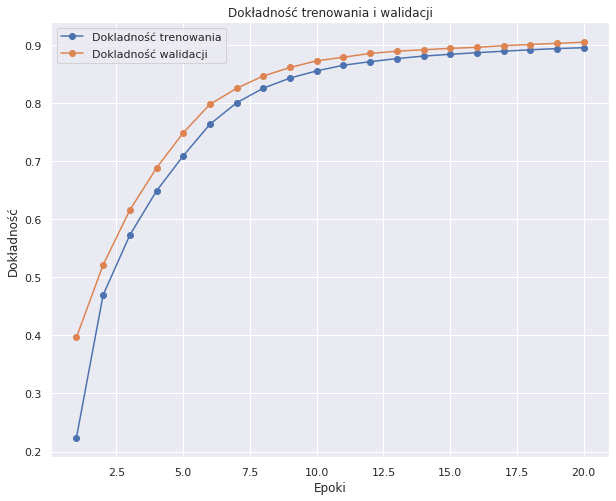

In [40]:
make_accuracy_plot(history)

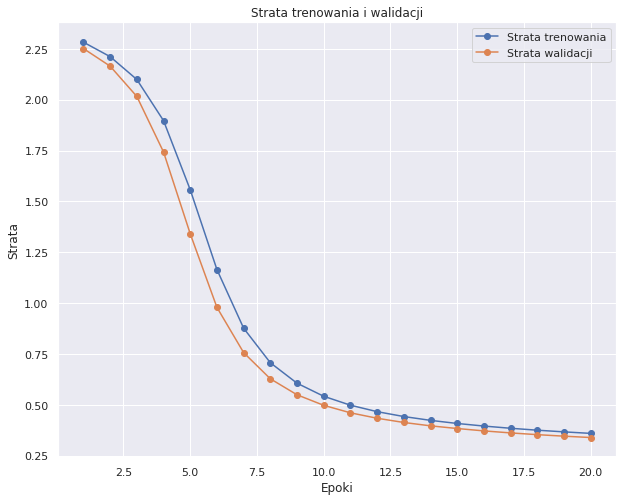

In [41]:
make_loss_plot(history)

##Wnioski
### Nie udało nam się osiągnąć zjawiska overfittingu w ciągu 20 epok